# creating the game_library dataframe

In [4]:
import requests
import env
from requests.models import Request, Response
from env import Client_ID
import pandas as pd
from igdb.igdbapi_pb2 import GameResult
from typing import Dict, List, Optional, Union, cast
import acquire
import json
import prepare
from igdb.wrapper import IGDBWrapper
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from prepare import wrangle_data
import plotly.graph_objects as go

In [ ]:
# game_library = pd.read_json("game_library.json")

In [ ]:
#game_library.shape

#  Pre-Explore Part 1 (just looking at the data)

### What genre are most common in this dataset ?

In [ ]:
# def to_1D(series):
#     return pd.Series([x for _list in series for x in _list])

In [ ]:
 #pd.set_option('display.max_columns', None)
# game_library.genres.value_counts()

In [ ]:
# def test_functg(random_list):
#     if type(random_list) == list:
#         return [genres_dict[i] for i in random_list]
#     else:  
#         return ["Not_available"] 

# Calling the data using the main wrangle function

In [2]:
game_library, game_ratings, not_rated = wrangle_data()


Completed import for game_library
Completed import for genres
Completed import for age_ratings
Completed import for age_rating_desc
Completed import for collections
Completed import for game_modes
Completed import for multi_player_modes
Completed import for platforms
Completed import for platform_families
Completed import for player_perspectives
Completed import for themes
Completed import for game_engines


/Users/gladybarrios/codeup-data-science/Videogame-Capstone/prepare.py:286: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  game_library[platform] = game_library['platforms'].apply(my_list, word=platform)
/Users/gladybarrios/codeup-data-science/Videogame-Capstone/prepare.py:286: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  game_library[platform] = game_library['platforms'].apply(my_list, word=platform)
/Users/gladybarrios/codeup-data-science/Videogame-Capstone/prepare.py:286: PerformanceWarning: DataFrame is highly fragmented.  Th

In [ ]:
pd.set_option('display.max_columns', None)
game_ratings.head()

In [ ]:
game_ratings.player_perspectives.value_counts()

### What themes are most common in this dataset 

In [ ]:
# fig, ax = plt.subplots(figsize = (16,4))
# ax.bar(to_1D(game_library["themes"]).value_counts().iloc[:4].index,
#         to_1D(game_library["themes"]).value_counts().iloc[:4].values)
# ax.set_ylabel("Frequency", size = 12)
# ax.set_title("genres", size = 14)

###   land co-op

In [ ]:
sns.countplot(x='lancoop', data=game_library)

### In a videogame what is the most common version titles ?

In [ ]:
sns.countplot(x='version_title', data=game_library, order=game_library.version_title.value_counts().iloc[:4].index)

### What are the most common platforms ?

In [ ]:
fig, ax = plt.subplots(figsize = (14,4))
ax.barplot(to_1D(game_library["platforms"]).value_counts().iloc[:7].index,
        to_1D(game_library["platforms"]).value_counts().iloc[:7].values, hue = )
ax.set_ylabel("Frequency", size = 12)
ax.set_title("platforms", size = 14)

## Splitting the data (from data with ratings and non-ratings)

- we are splitting the data with GAMES that have a rating and games that dont have a rating 

In [ ]:
#this is the dataframe that ONLY has ratings 
# df2 = game_library[game_library['rating'].notnull()]
# df2


In [ ]:
#this is a dataframe with no ratings 
# df3= game_library[game_library['rating'].isnull()]

In [ ]:
# pd.set_option('display.max_columns', None)
# df3.head()

> dont forget to bin the data from the diffrent ratings 

In [ ]:
# df2['rating_bin'] = pd.cut(df2.rating, 
#                            bins = [0,10,20, 30, 40, 50, 60, 70, 80, 90, 100],
#                            labels = ['awful','very_bad','bad','unimpressive','average','fair','alright','good','great', 'subperb'])


In [ ]:
#df2.head()

In [ ]:
#creating the json for the data that HAS ratings 
#df2.to_json("explore_game_library.json")

In [ ]:
# pd.set_option('display.max_columns', 500)
# df2.head()

# Exploration 

In [ ]:
# df2 = pd.read_json("explore_game_library.json")

In [ ]:
# pd.set_option('display.max_columns', 500)

# df2.head()

In [ ]:
#this is for tablaue 
#df2 = pd.read_csv("explore_game_library.csv")

In [ ]:
# df2 = pd.read_json("explore_game.json")

In [5]:
train, X_train, X_validate, X_test, y_train, y_validate, y_test = prepare.split(game_ratings, stratify_by='rating_bin')
X_train.head()

,id,first_release_date,genres,name,platforms,slug,player_perspectives,themes,campaigncoop,dropin,...,Xbox One,Family Computer Disk System,Arcade,Windows Phone,Apple II,Web browser,Odyssey,Commodore 16,New Nintendo 3DS,has_dlcs
156773,105583,2019-01-22,"[strategy, indie]",Beware of Trains,[win],beware-of-trains,[Not available],[action],0,0,...,0,0,0,0,0,0,0,0,0,0
176604,34461,2015-09-11,"[adventure, indie, visual-novel]",Sakura Swim Club,"[linux, win, mac, ps4--1, switch, ps5]",sakura-swim-club,[text],"[erotic, romance]",0,0,...,0,0,0,0,0,0,0,0,0,0
185694,115866,2019-05-24,"[adventure, indie]",Vampire & Monsters: Hidden Object Games,"[win, mac]",vampire-and-monsters-hidden-object-games,[Not available],[Not available],0,0,...,0,0,0,0,0,0,0,0,0,0
70709,76217,2017-11-10,[shooter],DOOM,[switch],doom--1,[first-person],"[action, science-fiction, horror, survival]",0,0,...,0,0,0,0,0,0,0,0,0,0
125000,888,2007-11-06,"[real-time-strategy-rts, strategy]",Supreme Commander: Forged Alliance,"[linux, win]",supreme-commander-forged-alliance,[bird-view-slash-isometric],"[action, science-fiction]",0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# def train_validate_test_split(df):
#     '''
#     This function performs split on telco data, stratify churn.
#     Returns train, validate, and test dfs.
#     '''
#     train_validate, test = train_test_split(df, test_size=.2, 
#                                         random_state=13, stratify=game_ratings.rating_bin)
#     train, validate = train_test_split(train_validate, test_size=.3, 
#                                    random_state=13,  stratify=train_validate.rating_bin)

#     return train, validate, test


In [ ]:
# train, validate, test = train_validate_test_split(game_ratings)

# train.shape, validate.shape, test.shape

In [6]:
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])



## (more complicated Questions)

# Do video games on certain platforms get better user ratings?


- Yes it looks like for the games in the three highest member ratings (good, great,subperb) the majority of those games are played on 
    - PC(microsoft Windows)
    - MAC 
    - X-Box 360
    - ps 3 and 4 

In [ ]:
#the diffrent platforms in the dataframe

In [ ]:
# fig, ax = plt.subplots(figsize = (14,4))
# ax.bar(to_1D(train["platforms"]).value_counts().iloc[:7].index,
#         to_1D(train["platforms"]).value_counts().iloc[:7].values)
# ax.set_ylabel("Frequency", size = 12)
# ax.set_title("platforms", size = 14)

## Exploring `good rating`

In [ ]:
# df_good_rating = train[train['rating_bin']== 'good']
# df_good_rating.head()

In [ ]:
# fig, ax = plt.subplots(figsize = (14,4))
# ax.bar(to_1D(df_good_rating["platforms"]).value_counts().iloc[:7].index,
#         to_1D(df_good_rating["platforms"]).value_counts().iloc[:7].values)
# ax.set_ylabel("Frequency", size = 12)
# ax.set_title("platforms", size = 14)

- for the ratings "good" the most used platforms is (in order) pc, xbox 360, ps3, ps4

##  Exploring `suberb raitng`

In [7]:
df_subperb_rating = train[train['rating_bin']== 'subperb']
df_subperb_rating.head(3)

,id,first_release_date,genres,name,platforms,slug,player_perspectives,themes,campaigncoop,dropin,...,Family Computer Disk System,Arcade,Windows Phone,Apple II,Web browser,Odyssey,Commodore 16,New Nintendo 3DS,has_dlcs,rating_bin
168408,142289,2018-03-14,"[point-and-click, adventure, indie]",Two Hours One Life,"[linux, win]",two-hours-one-life,[third-person],"[survival, open-world]",0,1,...,0,0,0,0,0,0,0,0,0,subperb
193244,24080,2002-04-26,"[role-playing-rpg, tactical, visual-novel]",Utawarerumono,"[win, ps2, psp]",utawarerumono,[Not available],[Not available],0,0,...,0,0,0,0,0,0,0,0,0,subperb
162112,26916,2017-03-28,"[role-playing-rpg, adventure]",Dark Souls III: The Ringed City,"[win, ps4--1, xboxone]",dark-souls-iii-the-ringed-city,[third-person],"[action, fantasy, open-world]",0,0,...,0,0,0,0,0,0,0,0,0,subperb


In [8]:
#drop those duplicates!!!
df_subperb_rating = df_subperb_rating.drop_duplicates(subset = "id")

> ### Most frequent platforms in the raiting `subperb`

In [ ]:
# fig, ax = plt.subplots(figsize = (14,4))
# ax.bar(to_1D(df_subperb_rating["platforms"]).value_counts().iloc[:7].index,
#         to_1D(df_subperb_rating["platforms"]).value_counts().iloc[:7].values)
# ax.set_ylabel("Frequency", size = 12)
# ax.set_title("platforms", size = 14)

- suberb rating is mostly mac and PC top two, and mest three are ps4 and ps3.

## Exploring `great rating`

In [ ]:
# df_great_rating = train[train['rating_bin']== 'great']
# df_great_rating.head(3)

In [ ]:
# fig, ax = plt.subplots(figsize = (14,4))
# ax.bar(to_1D(df_great_rating["platforms"]).value_counts().iloc[:7].index,
#         to_1D(df_great_rating["platforms"]).value_counts().iloc[:7].values)
# ax.set_ylabel("Frequency", size = 12)
# ax.set_title("platforms", size = 14)

In [ ]:

# df_top3_rating = train[(train['rating_bin']== 'great') | (train['rating_bin']== 'good') | (train['rating_bin']== 'subperb')]
# df_top3_rating.head(1)

## These are the top 4 platforms for the rating (subperb)

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

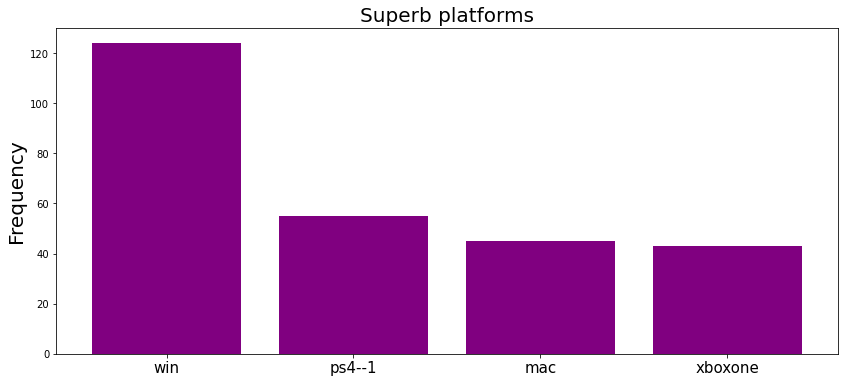

In [9]:
fig, ax = plt.subplots(figsize = (14,6))

ax.bar(to_1D(df_subperb_rating["platforms"]).value_counts().iloc[:4].index,
        to_1D(df_subperb_rating["platforms"]).value_counts().iloc[:4].values,
          color= ['purple'])
ax.set_ylabel("Frequency", size = 20)
ax.set_title("Superb platforms", size = 20)
plt.xticks(fontsize = 15)

In [ ]:
to_1D(df_subperb_rating["platforms"]).value_counts().iloc[:4].index

In [ ]:
to_1D(df_subperb_rating["platforms"]).value_counts().iloc[:4].values

In [ ]:
colors = ['purple',] * 5


fig = go.Figure(data=[go.Bar(
    x=['PC (Microsoft Windows)', 'PlayStation4' , 'MAC' , 'Xbox one'],
    y=[121, 63, 44,  41],
    marker_color=colors # marker color can be a single color value or an iterable
)])



fig.update_layout(title_text='Platforms', font=dict(size=17, color="black"))


fig.show()

In [ ]:
# df_subperb_rating["platforms"].value_counts().iloc[:4].index

In [ ]:
# to_1D(df_subperb_rating["platforms"]).value_counts().iloc[:4].index

In [ ]:
# to_1D(df_subperb_rating["platforms"]).value_counts().iloc[:4].values

In [ ]:
# df_subperb_rating["platforms"].value_counts().iloc[:4].index

- Yes it looks like for the games in the three highest member ratings (good, great,subperb) the majority of those games are played on 
    - PC(microsoft Windows)
    - Play Station 4 
    - X-box 1
    - Nintendo Switch

## These are the top 7 platforms for the lowest  ratings (bad, very bad , awful)

In [10]:
df_low3_rating = train[(train['rating_bin']== 'bad') | (train['rating_bin']== 'very_bad') | (train['rating_bin']== 'awful')]
df_low3_rating

,id,first_release_date,genres,name,platforms,slug,player_perspectives,themes,campaigncoop,dropin,...,Family Computer Disk System,Arcade,Windows Phone,Apple II,Web browser,Odyssey,Commodore 16,New Nintendo 3DS,has_dlcs,rating_bin
130342,124494,2005-12-31,[sport],Jikkyou Powerful Pro Yakyuu 12 Ketteiban,"[ps2, ngc]",jikkyou-powerful-pro-yakyuu-12-ketteiban,"[third-person, bird-view-slash-isometric]",[Not available],0,0,...,0,0,0,0,0,0,0,0,0,bad
178318,100545,2018-05-31,"[simulator, strategy]",Airport Simulator 2019,"[win, ps4--1, xboxone, switch]",airport-simulator-2019,"[third-person, bird-view-slash-isometric]",[business],0,0,...,0,0,0,0,0,0,0,0,0,bad
50488,89055,NaT,[Not available],RC Car,[Not available],rc-car,[Not available],[Not available],0,0,...,0,0,0,0,0,0,0,0,0,very_bad
143925,86726,2018-01-12,[puzzle],Word Puzzle Game,[mac],word-puzzle-game,[Not available],[Not available],0,0,...,0,0,0,0,0,0,0,0,0,very_bad
96611,35833,2015-01-27,[indie],Break the Cube,[win],break-the-cube,[Not available],[Not available],0,0,...,0,0,0,0,0,0,0,0,0,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115164,29442,2017-03-16,[Not available],The Last Patient,[win],the-last-patient,[Not available],[action],0,0,...,0,0,0,0,0,0,0,0,0,bad
36021,89573,NaT,[Not available],Color Math,[Not available],color-math,[Not available],[Not available],0,0,...,0,0,0,0,0,0,0,0,0,very_bad
199471,13127,2005-11-17,[simulator],The Sims 2: Happy Holiday Pack,[win],the-sims-2-happy-holiday-pack,[bird-view-slash-isometric],[sandbox],0,0,...,0,0,0,0,0,0,0,0,0,very_bad
66132,74556,NaT,[shooter],Until None Remain - Battle Royale VR,[Not available],until-none-remain-battle-royale-vr,"[first-person, virtual-reality]","[action, science-fiction]",0,0,...,0,0,0,0,0,0,0,0,0,bad


In [11]:
df_low3_rating = df_low3_rating.drop_duplicates(subset = "id")

Text(0.5, 1.0, 'platforms')

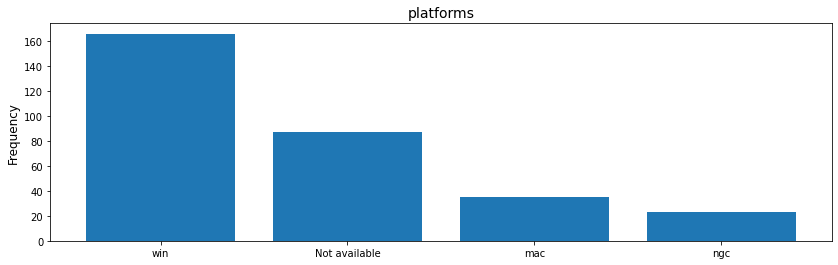

In [12]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(df_low3_rating["platforms"]).value_counts().iloc[:4].index,
        to_1D(df_low3_rating["platforms"]).value_counts().iloc[:4].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("platforms", size = 14)

In [13]:
df_low3_rating.platforms.value_counts()

[win]                                            115
[Not available]                                   87
[ios]                                             13
[linux, win, mac]                                 12
[ps2, ngc]                                        10
[mac]                                             10
[win, mac]                                         8
[ngc]                                              6
[win, ps4--1, xboxone]                             5
[nds]                                              3
[gb]                                               3
[win, android, ios]                                3
[ps2, xbox, ngc]                                   3
[linux, win]                                       2
[win, ps4--1, xboxone, switch]                     2
[win, ps, saturn]                                  1
[sfam]                                             1
[amiga, gb, atari-st]                              1
[nes, trs-80]                                 

---------

# Q2- what is the most common genre in games that are `subperb` (the highest rating)

- Answer- the most common Genre in the higest rating are adventure, role-playing- rpg, shoter, rts, racing 

In [ ]:
pd.set_option('display.max_columns', 500)
df_subperb_rating.head()

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

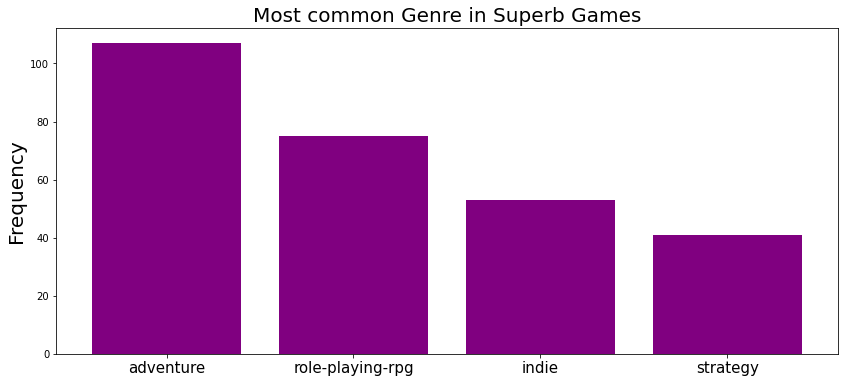

In [14]:
fig, ax = plt.subplots(figsize = (14,6))
ax.bar(to_1D(df_subperb_rating["genres"]).value_counts().iloc[:4].index,
        to_1D(df_subperb_rating["genres"]).value_counts().iloc[:4].values,
         color= ['purple'])
ax.set_ylabel("Frequency", size = 20)
ax.set_title("Most common Genre in Superb Games", size = 20)
plt.xticks(fontsize = 15)

In [ ]:
(to_1D(df_subperb_rating["genres"]).value_counts().iloc[:4].index)

In [ ]:
(to_1D(df_subperb_rating["genres"]).value_counts().iloc[:4].values)

In [ ]:
colors = ['purple',] * 5


fig = go.Figure(data=[go.Bar(
    x=['Adventure', 'Role-Playing-RPG' , 'Indie' , 'Strategy'],
    y=[104, 75, 48,  41],
    marker_color=colors # marker color can be a single color value or an iterable
)])
fig.update_layout(title_text='Genre', font=dict(size=17, color="black"))

>- Answer- the most common Genre in the higest rating are adventure, role-playing- rpg, shoter, rts, racing 

## Q 2.1 what about the three highest ratings (good, great, subperb) ? what is the overall most highest genre

In [ ]:
# fig, ax = plt.subplots(figsize = (14,4))
# ax.bar(to_1D(df_top3_rating["genres"]).value_counts().iloc[:7].index,
#         to_1D(df_top3_rating["genres"]).value_counts().iloc[:7].values)
# ax.set_ylabel("Frequency", size = 12)
# ax.set_title("genres", size = 14)

## Q 2.2 what about the three lowest ratings ((bad, very bad , awful)) ? what is the overall most highest genre in these low rating games?

Text(0.5, 1.0, 'genre')

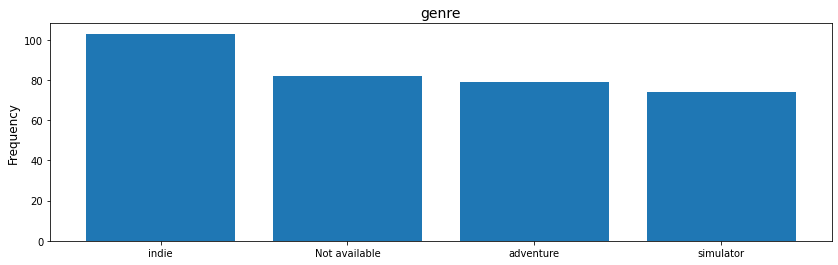

In [15]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(df_low3_rating["genres"]).value_counts().iloc[:4].index,
        to_1D(df_low3_rating["genres"]).value_counts().iloc[:4].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("genre", size = 14)

In [ ]:
colors = ['blue',] * 5


fig = go.Figure(data=[go.Bar(
    x=['indie', 'adventure', 'Not available', 'simulator'],
    y=[94, 80, 73, 69],
    marker_color=colors # marker color can be a single color value or an iterable
)])
fig.update_layout(title_text='Genre', font=dict(size=17, color="black"))

In [ ]:
to_1D(df_low3_rating["genres"]).value_counts().iloc[:4].index

In [ ]:
to_1D(df_low3_rating["genres"]).value_counts().iloc[:4].values

In [ ]:
# df_low2_rating = df2[(df2['rating_bin']== 'very_bad') | (df2['rating_bin']== 'awful')]
# df_low2_rating.head()
#this was not needed 

# Q3- what is the most common theme in games that are subperb (the highest rating)

Answer - the most common themes in the subperb is action, fantasy, science fiction, historical.

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

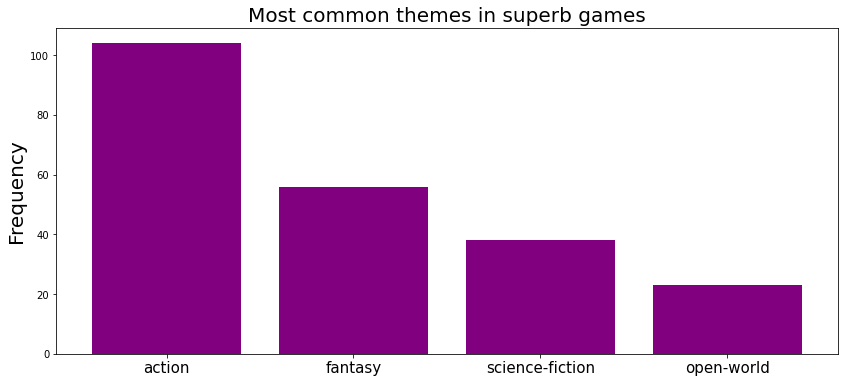

In [16]:
fig, ax = plt.subplots(figsize = (14,6))
ax.bar(to_1D(df_subperb_rating["themes"]).value_counts().iloc[:4].index,
        to_1D(df_subperb_rating["themes"]).value_counts().iloc[:4].values,
           color= ['purple'])
ax.set_ylabel("Frequency", size = 20)
ax.set_title("Most common themes in superb games", size = 20)
plt.xticks(fontsize = 15)

In [ ]:
to_1D(df_subperb_rating["themes"]).value_counts().iloc[:4].index

In [ ]:
to_1D(df_subperb_rating["themes"]).value_counts().iloc[:4].values

In [ ]:
colors = ['purple',] * 5


fig = go.Figure(data=[go.Bar(
    x=['Action', 'Fantasy', 'Science-Fiction', 'Open-World'],
    y=[107,  66,  36,  28],
    marker_color=colors # marker color can be a single color value or an iterable
)])
fig.update_layout(title_text='Themes', font=dict(size=17, color="black"))

## Q3.1- what is the most common theme in games that are three highest ratings (good, great, subperb)?

In [ ]:
# fig, ax = plt.subplots(figsize = (14,4))
# ax.bar(to_1D(df_top3_rating["themes"]).value_counts().iloc[:7].index,
#         to_1D(df_top3_rating["themes"]).value_counts().iloc[:7].values)
# ax.set_ylabel("Frequency", size = 12)
# ax.set_title("Themes", size = 14)

## Q3.1- what is the most common theme in games that are three lowest ratings ((bad, very bad , awful)) ?

Text(0.5, 1.0, 'Themes')

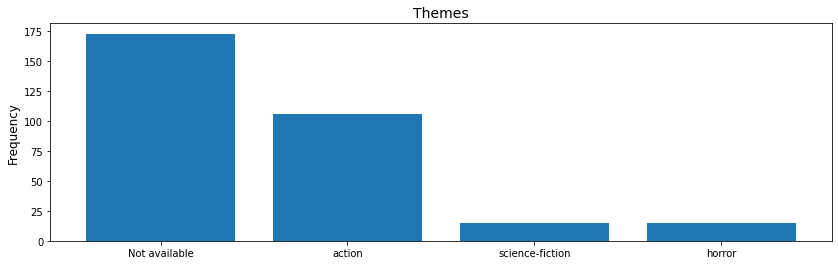

In [17]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(df_low3_rating["themes"]).value_counts().iloc[:4].index,
        to_1D(df_low3_rating["themes"]).value_counts().iloc[:4].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Themes", size = 14)

# Q4-  Do users rate games with online multiplayer modes higher than games that lack online multiplayer modes?

> since there is a gap time from game that can be played online and games that cannot- we decided to remove that gap and make sure that the games all come out in the same time period


### _answer:_ even after removing that time gap the games that are `NOT` multiplayer online games are rated higher than non-multiplayer games

In [ ]:
df2.head(2)

>## Not online multi

In [ ]:
#making sure all games are comming out of the same time period
train['created_at'] = pd.to_datetime(train['created_at'],unit='s')

In [ ]:
train.onlinecoop.value_counts()

In [ ]:
NOT_online_multi = train[train['onlinecoop']== False]
NOT_online_multi.head(1)

In [ ]:
NOT_online_multi['first_release_date'] = pd.to_datetime(NOT_online_multi['first_release_date'],unit='s')

In [ ]:
NOT_online_multi.head()

In [ ]:
NOT_online_multi.first_release_date.value_counts()

In [ ]:
NOT_online_multi['first_release_date_year'] = NOT_online_multi.first_release_date.dt.year

In [ ]:
NOT_online_multi.first_release_date_year.value_counts()

In [ ]:
NOT_online_multi.head()

In [ ]:
#1981 is the lowest date in online i will it cut it off there 

In [ ]:
NOT_online_multi = NOT_online_multi[NOT_online_multi['first_release_date_year'] > 1981.0]
NOT_online_multi.head(1)

In [ ]:
NOT_online_multi.first_release_date_year.value_counts()

## Not online multi-player that games are after 1981

In [ ]:
plt.figure(figsize=(12,5))
c = sns.countplot(x='rating_bin', data=NOT_online_multi)

for p in c.patches:
    c.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2.0, 
                 p.get_height()), 
                 ha = 'center', 
                 va = 'center', 
                 xytext = (1, 5),
                 textcoords = 'offset points')

>##  online multi

In [ ]:
df_online_multi = df2[df2['onlinecoop']== True]
df_online_multi.head(1)

## Games that are after 1981 - Ratings 

In [ ]:
plt.figure(figsize=(12,5))
c = sns.countplot(x='rating_bin', data=df_online_multi)

for p in c.patches:
    c.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2.0, 
                 p.get_height()), 
                 ha = 'center', 
                 va = 'center', 
                 xytext = (1, 5),
                 textcoords = 'offset points')

### figuring out the time period for online games

In [ ]:
df_online_multi['first_release_date'] = pd.to_datetime(df_online_multi['first_release_date'],unit='s')

In [ ]:
df_online_multi.head(1)

In [ ]:
df_online_multi['first_release_date_year'] = df_online_multi.first_release_date.dt.year

In [ ]:
df_online_multi.first_release_date_year.value_counts()

 # Q 4- Does a certain game_mode determine the game rating?

In [ ]:
train.head()

In [ ]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(train["game_modes"]).value_counts().iloc[:7].index,
        to_1D(train["game_modes"]).value_counts().iloc[:7].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("platforms", size = 14)

- looks liek most common games are single and multi player, and co op 

In [ ]:
fig, ax = plt.subplots(figsize = (14,6))
ax.bar(to_1D(df_subperb_rating["game_modes"]).value_counts().iloc[:4].index,
        to_1D(df_subperb_rating["game_modes"]).value_counts().iloc[:4].values,
         color= ['purple'])
ax.set_ylabel("Frequency", size = 20)
ax.set_title("Most common Genre in Superb Games", size = 20)

- didnt find anything important

In [ ]:
train.head(3)

# What Are the most common player perspectives in 

In [ ]:
df_subperb_rating.player_perspectives.value_counts()

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

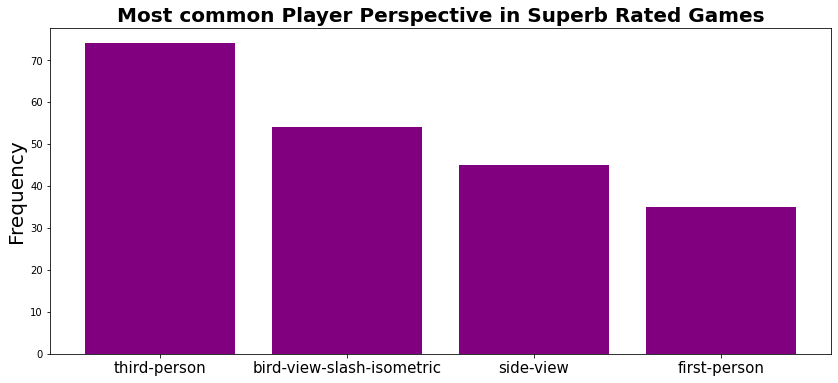

In [18]:
fig, ax = plt.subplots(figsize = (14,6))
ax.bar(to_1D(df_subperb_rating["player_perspectives"]).value_counts().iloc[:4].index,
        to_1D(df_subperb_rating["player_perspectives"]).value_counts().iloc[:4].values,
         color= ['purple'])

ax.set_ylabel("Frequency", size = 20)
ax.set_title("Most common Player Perspective in Superb Rated Games", size = 20, fontweight='bold')

plt.xticks(fontsize = 15)

In [ ]:
to_1D(df_subperb_rating["player_perspectives"]).value_counts().iloc[:4].index

In [ ]:
to_1D(df_subperb_rating["player_perspectives"]).value_counts().iloc[:4].values

In [ ]:
colors = ['purple',] * 5


fig = go.Figure(data=[go.Bar(
    x=['Third-Person', 'Bird-view / Isometric', 'Side-View','First-Person'],
    y=[285, 226, 218,  11],
    marker_color=colors # marker color can be a single color value or an iterable
)])
fig.update_layout(title_text='Player Perspectives',  font=dict(size=17, color="black"))

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

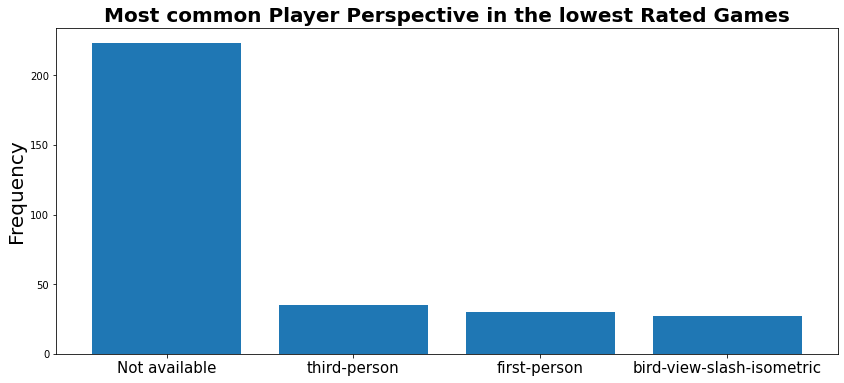

In [19]:
fig, ax = plt.subplots(figsize = (14,6))
ax.bar(to_1D(df_low3_rating["player_perspectives"]).value_counts().iloc[:4].index,
        to_1D(df_low3_rating["player_perspectives"]).value_counts().iloc[:4].values)

ax.set_ylabel("Frequency", size = 20)
ax.set_title("Most common Player Perspective in the lowest Rated Games", size = 20, fontweight='bold')

plt.xticks(fontsize = 15)

- looks like the majority of the best games have third person and, bird view/isometric 

# what can i find more info on subperb ratings?

In [ ]:
df_subperb_rating

In [ ]:
df_subperb_rating.id.unique()

In [ ]:
print(df_subperb_rating["id"].unique())

In [ ]:
print(df_subperb_rating["id"].nunique())

In [ ]:
df_subperb_rating.id.value_counts()

In [ ]:
df_subperb_rating["id"]== 6440

In [ ]:
df_subperb_rating.loc[df_subperb_rating['id'] == 1070]

In [ ]:
df_subperb_rating.loc[df_subperb_rating['id'] == 6440]

In [ ]:
df_subperb_rating = df_subperb_rating.drop_duplicates(subset = "id")

In [ ]:
df_subperb_rating